In [35]:
!

  Using cached chromadb-0.6.3-py3-none-any.whl.metadata (6.8 kB)
  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached chroma_hnswlib-0.7.6.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/611.1 kB ? eta -:--:--
   ---------------------------------------- 611.1/611.1 kB 3.2 MB/s eta 0:00:00
   --

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [5 lines of output]
  running bdist_wheel
  running build
  running build_ext
  building 'hnswlib' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for chroma-hnswlib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (chroma-hnswlib)


In [27]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3.2:latest",
    temperature=0,
    base_url = "http://192.168.1.203:11434"
)
llm.invoke('안녕하세요')

AIMessage(content='안녕하세요! (Hello!) How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:latest', 'created_at': '2025-03-07T05:21:28.383606808Z', 'done': True, 'done_reason': 'stop', 'total_duration': 5630991444, 'load_duration': 3770677489, 'prompt_eval_count': 27, 'prompt_eval_duration': 1717000000, 'eval_count': 14, 'eval_duration': 135000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-d1b0f008-f5ad-4f87-8a34-8f35786119ae-0', usage_metadata={'input_tokens': 27, 'output_tokens': 14, 'total_tokens': 41})

In [48]:
!ollama list

NAME                                                                ID              SIZE      MODIFIED     
deepseek-r1:latest                                                  0a8c26691023    4.7 GB    2 weeks ago     
llama3.2:latest                                                     a80c4f17acd5    2.0 GB    3 weeks ago     
bge-m3:latest                                                       790764642607    1.2 GB    5 weeks ago     
ggml-model-Q4_K_M:latest                                            9880425c1845    6.5 GB    5 weeks ago     
hf.co/bartowski/Qwen2.5-Coder-32B-Instruct-abliterated-GGUF:Q6_K    7cc76d49d684    26 GB     2 months ago    
llama3.2-vision:11b                                                 085a1fdae525    7.9 GB    2 months ago    
opencoder:latest                                                    c320df6c224d    4.7 GB    3 months ago    
minicpm-v:latest                                                    1862d7d5fee5    5.5 GB    3 months ago    


In [1]:
import pymysql

# MySQL 접속 정보
host = "127.0.0.1"  # local host
port = 3306  # basic port
user = "root"  # MySQL 사용자
password = ""  # MySQL 비밀번호
database = "classicmodels"  
try:
    # MySQL 연결
    connection = pymysql.connect(host=host, port=port, user=user, password=password)
    cursor = connection.cursor()

    # 데이터베이스 목록 확인
    cursor.execute("SHOW DATABASES;")
    databases = cursor.fetchall()

    print("MySQL 데이터베이스 목록:")
    for db in databases:
        print(db[0])

except pymysql.MySQLError as e:
    print(f"오류 발생: {e}")
finally:
    if connection:
        connection.close()  # 연결 종료


MySQL 데이터베이스 목록:
information_schema
classicmodels
dataiku_connection
mysql
performance_schema
sys


In [2]:
from langchain_community.utilities.sql_database import SQLDatabase
db = SQLDatabase.from_uri(f"mysql+pymysql://{user}:{password}@{host}/{database}")
print(db.dialect)
print(db.get_usable_table_names())

mysql
['customers', 'employees', 'offices', 'orderdetails', 'orders', 'payments', 'productlines', 'products']


In [6]:
from pprint import pprint
pprint(db.get_table_info())

('\n'
 'CREATE TABLE customers (\n'
 '\t`customerNumber` INTEGER(11) NOT NULL, \n'
 '\t`customerName` VARCHAR(50) NOT NULL, \n'
 '\t`contactLastName` VARCHAR(50) NOT NULL, \n'
 '\t`contactFirstName` VARCHAR(50) NOT NULL, \n'
 '\tphone VARCHAR(50) NOT NULL, \n'
 '\t`addressLine1` VARCHAR(50) NOT NULL, \n'
 '\t`addressLine2` VARCHAR(50), \n'
 '\tcity VARCHAR(50) NOT NULL, \n'
 '\tstate VARCHAR(50), \n'
 '\t`postalCode` VARCHAR(15), \n'
 '\tcountry VARCHAR(50) NOT NULL, \n'
 '\t`salesRepEmployeeNumber` INTEGER(11), \n'
 '\t`creditLimit` DECIMAL(10, 2), \n'
 '\tPRIMARY KEY (`customerNumber`), \n'
 '\tCONSTRAINT customers_ibfk_1 FOREIGN KEY(`salesRepEmployeeNumber`) '
 'REFERENCES employees (`employeeNumber`)\n'
 ')ENGINE=InnoDB DEFAULT CHARSET=latin1\n'
 '\n'
 '/*\n'
 '3 rows from customers table:\n'
 'customerNumber\tcustomerName\tcontactLastName\tcontactFirstName\tphone\t'
 'addressLine1\taddressLine2\tcity\tstate\tpostalCode\tcountry\t'
 'salesRepEmployeeNumber\tcreditLimit\n'
 '103\tAt

In [4]:
from langchain.chains import create_sql_query_chain
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="ggml-model-Q4_K_M:latest",
    temperature=0,
)
generate_query = create_sql_query_chain(llm, db)
query = generate_query.invoke({"question": "what is price of `1968 Ford Mustang`"})
# "what is price of `1968 Ford Mustang`"
print(query)

To find the price of the "1968 Ford Mustang" product, you can use the following SQL query:

```sql
SELECT MSRP FROM products WHERE productName = '1968 Ford Mustang';
```

This query will return the `MSRP` (Manufacturer's Suggested Retail Price) for the specified product. If the product is not found in the table, you may need to adjust the product name or search for it using other criteria such as `productCode`.


In [5]:
import re

def clean_sql_query(text: str) -> str:
    """
    Clean SQL query by removing code block syntax, various SQL tags, backticks,
    prefixes, and unnecessary whitespace while preserving the core SQL query.

    Args:
        text (str): Raw SQL query text that may contain code blocks, tags, and backticks

    Returns:
        str: Cleaned SQL query
    """
    # Step 1: Remove code block syntax and any SQL-related tags
    # This handles variations like ```sql, ```SQL, ```SQLQuery, etc.
    block_pattern = r"```(?:sql|SQL|SQLQuery|mysql|postgresql)?\s*(.*?)\s*```"
    text = re.sub(block_pattern, r"\1", text, flags=re.DOTALL)

    # Step 2: Handle "SQLQuery:" prefix and similar variations
    # This will match patterns like "SQLQuery:", "SQL Query:", "MySQL:", etc.
    prefix_pattern = r"^(?:SQL\s*Query|SQLQuery|MySQL|PostgreSQL|SQL)\s*:\s*"
    text = re.sub(prefix_pattern, "", text, flags=re.IGNORECASE)

    # Step 3: Extract the first SQL statement if there's random text after it
    # Look for a complete SQL statement ending with semicolon
    sql_statement_pattern = r"(SELECT.*?;)"
    sql_match = re.search(sql_statement_pattern, text, flags=re.IGNORECASE | re.DOTALL)
    if sql_match:
        text = sql_match.group(1)

    # Step 4: Remove backticks around identifiers
    text = re.sub(r'`([^`]*)`', r'\1', text)

    # Step 5: Normalize whitespace
    # Replace multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)

    # Step 6: Preserve newlines for main SQL keywords to maintain readability
    keywords = ['SELECT', 'FROM', 'WHERE', 'GROUP BY', 'HAVING', 'ORDER BY',
               'LIMIT', 'JOIN', 'LEFT JOIN', 'RIGHT JOIN', 'INNER JOIN',
               'OUTER JOIN', 'UNION', 'VALUES', 'INSERT', 'UPDATE', 'DELETE']

    # Case-insensitive replacement for keywords
    pattern = '|'.join(r'\b{}\b'.format(k) for k in keywords)
    text = re.sub(f'({pattern})', r'\n\1', text, flags=re.IGNORECASE)

    # Step 7: Final cleanup
    # Remove leading/trailing whitespace and extra newlines
    text = text.strip()
    text = re.sub(r'\n\s*\n', '\n', text)

    return text


In [6]:
query = clean_sql_query(query)
print(query)

SELECT MSRP 
FROM products 
WHERE productName = '1968 Ford Mustang';


In [8]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool
execute_query = QuerySQLDataBaseTool(db=db)
execute_query.invoke(query)

"[(Decimal('194.57'),)]"

In [9]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

chain = generate_query | RunnableLambda(clean_sql_query) | execute_query

chain.invoke({"question": "How many orders are there"})

'[(326,)]'

In [11]:
chain.get_prompts()[0].pretty_print()

You are a MySQL expert. Given an input question, first create a syntactically correct MySQL query to run, then look at the results of the query and return the answer to the input question.
Unless the user specifies in the question a specific number of examples to obtain, query for at most 5 results using the LIMIT clause as per MySQL. You can order the results to return the most informative data in the database.
Never query for all columns from a table. You must query only the columns that are needed to answer the question. Wrap each column name in backticks (`) to denote them as delimited identifiers.
Pay attention to use only the column names you can see in the tables below. Be careful to not query for columns that do not exist. Also, pay attention to which column is in which table.
Pay attention to use CURDATE() function to get the current date, if the question involves "today".

Use the following format:

Question: Question here
SQLQuery: SQL Query to run
SQLResult: Result of the S

In [53]:
from operator import itemgetter

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

answer_prompt = PromptTemplate.from_template(
    """Given the following user question, corresponding SQL query, and SQL result, answer the user question.

Question: {question}
SQL Query: {query}
SQL Result: {result}
Answer: """
)

rephrase_answer = answer_prompt | llm | StrOutputParser()

chain = (
    RunnablePassthrough.assign(query=generate_query | RunnableLambda(clean_sql_query)).assign(
        result=itemgetter("query") | execute_query
    )
    | rephrase_answer
)

chain.invoke({"question": "How many orders are there"})

'There are 326 orders in total.'

In [54]:
chain.invoke({"question": "do you know about '1969 Harley Davidson Ultimate Chopper'"})

"Based on the provided SQL result, I can confirm that there is a product called '1969 Harley Davidson Ultimate Chooper' in your database. This motorcycle model has the following details:\n\n* Product Name: 1969 Harley Davidson Ultimate Chooper\n* Product Line: Motorcycles\n* Product Scale: 1:10\n* Product Vendor: Min Lin Diecast\n* Product Description: This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.\n* Quantity in Stock: 7933 units\n* Buy Price: $48.81\n* MSRP (Manufacturer's Suggested Retail Price): $95.70\n\nI hope this information helps you with your query! If you have any further questions or need additional assistance, please feel free to ask."

In [7]:
from typing import Any

from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

#툴노드 실패시 콜백 처리 
def create_tool_node_with_fallback(tools: list) -> RunnableWithFallbacks[Any, dict]:
    """
    Create a ToolNode with a fallback to handle errors and surface them to the agent.
    """
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )

#에러 메세지 출력 
def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }

In [58]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="hf.co/bartowski/Qwen2.5-Coder-32B-Instruct-abliterated-GGUF:Q6_K",
    temperature=0,
)

#랭체인 prebulit ToolKit 사용 
toolkit = SQLDatabaseToolkit(db=db, llm=llm)
tools = toolkit.get_tools()
#QuerySQLDatabaseTool -> 쿼리 실행 툴
#InfoSQLDatabaseTool -> db 메타데이터 가져오는 툴(스키마 정보랑 샘플) 
#ListSQLDatabaseTool -> 테이블 이름 가져오는 툴
#QuerySQLCheckerTool -> 쿼리 유효성 확인 툴
list_tables_tool = next(tool for tool in tools if tool.name == "sql_db_list_tables")
get_schema_tool = next(tool for tool in tools if tool.name == "sql_db_schema")


print(list_tables_tool.invoke(""))

print(get_schema_tool.invoke("employees"))

customers, employees, offices, orderdetails, orders, payments, productlines, products

CREATE TABLE employees (
	`employeeNumber` INTEGER(11) NOT NULL, 
	`lastName` VARCHAR(50) NOT NULL, 
	`firstName` VARCHAR(50) NOT NULL, 
	extension VARCHAR(10) NOT NULL, 
	email VARCHAR(100) NOT NULL, 
	`officeCode` VARCHAR(10) NOT NULL, 
	`reportsTo` INTEGER(11), 
	`jobTitle` VARCHAR(50) NOT NULL, 
	PRIMARY KEY (`employeeNumber`), 
	CONSTRAINT employees_ibfk_1 FOREIGN KEY(`reportsTo`) REFERENCES employees (`employeeNumber`), 
	CONSTRAINT employees_ibfk_2 FOREIGN KEY(`officeCode`) REFERENCES offices (`officeCode`)
)ENGINE=InnoDB DEFAULT CHARSET=latin1

/*
3 rows from employees table:
employeeNumber	lastName	firstName	extension	email	officeCode	reportsTo	jobTitle
1002	Murphy	Diane	x5800	dmurphy@classicmodelcars.com	1	None	President
1056	Patterson	Mary	x4611	mpatterso@classicmodelcars.com	1	1002	VP Sales
1076	Firrelli	Jeff	x9273	jfirrelli@classicmodelcars.com	1	1002	VP Marketing
*/


In [83]:
print(get_schema_tool.invoke("customers"))


CREATE TABLE customers (
	`customerNumber` INTEGER(11) NOT NULL, 
	`customerName` VARCHAR(50) NOT NULL, 
	`contactLastName` VARCHAR(50) NOT NULL, 
	`contactFirstName` VARCHAR(50) NOT NULL, 
	phone VARCHAR(50) NOT NULL, 
	`addressLine1` VARCHAR(50) NOT NULL, 
	`addressLine2` VARCHAR(50), 
	city VARCHAR(50) NOT NULL, 
	state VARCHAR(50), 
	`postalCode` VARCHAR(15), 
	country VARCHAR(50) NOT NULL, 
	`salesRepEmployeeNumber` INTEGER(11), 
	`creditLimit` DECIMAL(10, 2), 
	PRIMARY KEY (`customerNumber`), 
	CONSTRAINT customers_ibfk_1 FOREIGN KEY(`salesRepEmployeeNumber`) REFERENCES employees (`employeeNumber`)
)ENGINE=InnoDB DEFAULT CHARSET=latin1

/*
3 rows from customers table:
customerNumber	customerName	contactLastName	contactFirstName	phone	addressLine1	addressLine2	city	state	postalCode	country	salesRepEmployeeNumber	creditLimit
103	Atelier graphique	Schmitt	Carine 	40.32.2555	54, rue Royale	None	Nantes	None	44000	France	1370	21000.00
112	Signal Gift Stores	King	Jean	7025551838	8489 S

In [59]:
from langchain_core.tools import tool

#쿼리실행 TOOL / 왜 QuerySQLDatabaseTool로 안쓴거지?
@tool
def db_query_tool(query: str) -> str:
    """
    Execute a SQL query against the database and get back the result.
    If the query is not correct, an error message will be returned.
    If an error is returned, rewrite the query, check the query, and try again.
    """
    result = db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result


print(db_query_tool.invoke("SELECT * FROM products LIMIT 10;"))

[('S10_1678', '1969 Harley Davidson Ultimate Chopper', 'Motorcycles', '1:10', 'Min Lin Diecast', 'This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.', 7933, Decimal('48.81'), Decimal('95.70')), ('S10_1949', '1952 Alpine Renault 1300', 'Classic Cars', '1:10', 'Classic Metal Creations', 'Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.', 7305, Decimal('98.58'), Decimal('214.30')), ('S10_2016', '1996 Moto Guzzi 1100i', 'Motorcycles', '1:10', 'Highway 66 Mini Classics', 'Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with 

In [60]:
from langchain_core.prompts import ChatPromptTemplate

# Prompt와 쿼리 실행 툴 bind 후 실행 테스트
query_check_system = """You are a SQL expert with a strong attention to detail.
Double check the SQLite query for common mistakes, including:
- Using NOT IN with NULL values
- Using UNION when UNION ALL should have been used
- Using BETWEEN for exclusive ranges
- Data type mismatch in predicates
- Properly quoting identifiers
- Using the correct number of arguments for functions
- Casting to the correct data type
- Using the proper columns for joins

If there are any of the above mistakes, rewrite the query. If there are no mistakes, just reproduce the original query.

You will call the appropriate tool to execute the query after running this check."""

query_check_prompt = ChatPromptTemplate.from_messages(
    [("system", query_check_system), ("placeholder", "{messages}")]
)
query_check = query_check_prompt | llm.bind_tools(
    [db_query_tool], tool_choice="required"
)

query_check.invoke({"messages": [("user", "SELECT * FROM products LIMIT 10;")]})

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'hf.co/bartowski/Qwen2.5-Coder-32B-Instruct-abliterated-GGUF:Q6_K', 'created_at': '2025-02-17T05:58:24.299875954Z', 'done': True, 'done_reason': 'stop', 'total_duration': 30927637720, 'load_duration': 23584234311, 'prompt_eval_count': 315, 'prompt_eval_duration': 1640000000, 'eval_count': 96, 'eval_duration': 4867000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-26671b3e-6405-4a0b-87ba-909e674cdb96-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM products LIMIT 10;'}, 'id': '6febae23-d374-4861-b70e-3737432a8677', 'type': 'tool_call'}], usage_metadata={'input_tokens': 315, 'output_tokens': 96, 'total_tokens': 411})

In [61]:
from typing import Annotated, Literal

from langchain_core.messages import AIMessage

from pydantic import BaseModel, Field
from typing_extensions import TypedDict

from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages

# 랭그래프로 구현 
# Define the state for the agent
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


# Define a new graph
workflow = StateGraph(State)

#시작 시 사용 할 수 있는 테이블 정보 가져올 수 있도록 User Input 과 상관 없이 강제로 Tool calling
# Add a node for the first tool call
def first_tool_call(state: State) -> dict[str, list[AIMessage]]:
    return {
        "messages": [
            AIMessage(
                content="",
                tool_calls=[
                    {
                        "name": "sql_db_list_tables",
                        "args": {},
                        "id": "tool_abcd123",
                    }
                ],
            )
        ]
    }

# 쿼리 체크 툴
def model_check_query(state: State) -> dict[str, list[AIMessage]]:
    """
    Use this tool to double-check if your query is correct before executing it.
    """
    return {"messages": [query_check.invoke({"messages": [state["messages"][-1]]})]}

#첫번째 툴 콜 노드
workflow.add_node("first_tool_call", first_tool_call)

#테이블 검색이랑 스키마 검색 + 툴실행시 예외 처리
# Add nodes for the first two tools
workflow.add_node(
    "list_tables_tool", create_tool_node_with_fallback([list_tables_tool]) # list_tables_tool 테이블 이름 출력
)
workflow.add_node("get_schema_tool", create_tool_node_with_fallback([get_schema_tool])) # get_schema_tool 테이블 스키마 출력

#툴콜링으로 스키마 정보 가져오기 
# Add a node for a model to choose the relevant tables based on the question and available tables
model_get_schema = llm.bind_tools(
    [get_schema_tool]
)
workflow.add_node(
    "model_get_schema",
    lambda state: {
        "messages": [model_get_schema.invoke(state["messages"])],
    },
)


#답변생성
# Describe a tool to represent the end state
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""

    final_answer: str = Field(..., description="The final answer to the user")

#툴사용 프롬프트
# Add a node for a model to generate a query based on the question and schema
query_gen_system = """You are a SQL expert with a strong attention to detail.

Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

When generating the query:

Output the SQL query that answers the input question without a tool call.

Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.
You can order the results by a relevant column to return the most interesting examples in the database.
Never query for all the columns from a specific table, only ask for the relevant columns given the question.

If you get an error while executing a query, rewrite the query and try again.

If you get an empty result set, you should try to rewrite the query to get a non-empty result set. 
NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database."""
query_gen_prompt = ChatPromptTemplate.from_messages(
    [("system", query_gen_system), ("placeholder", "{messages}")]
)
#쿼리생성 체인 연결 
query_gen = query_gen_prompt | llm.bind_tools(
    [SubmitFinalAnswer]
)

#쿼리 생성 노드, 할루시네이션 있으면 다시 실행하도록
def query_gen_node(state: State):
    message = query_gen.invoke(state)

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

#쿼리실행
workflow.add_node("query_gen", query_gen_node)

#쿼리 실행전 쿼리 체크
# Add a node for the model to check the query before executing it
workflow.add_node("correct_query", model_check_query)

#실행 쿼리 
# Add node for executing the query
workflow.add_node("execute_query", create_tool_node_with_fallback([db_query_tool]))

# 답변 생성전 체크
# Define a conditional edge to decide whether to continue or end the workflow
def should_continue(state: State) -> Literal[END, "correct_query", "query_gen"]:
    messages = state["messages"]
    last_message = messages[-1]
    # If there is a tool call, then we finish
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

#그래프 선 연결
# Specify the edges between the nodes
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges(
    "query_gen",
    should_continue,
)
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

# Compile the workflow into a runnable
app = workflow.compile()

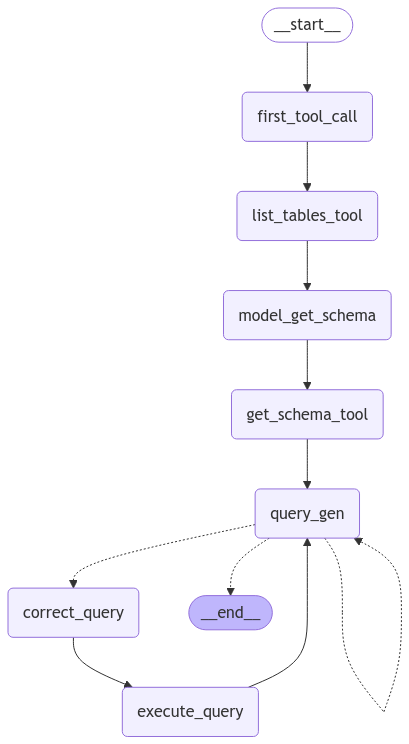

In [62]:
app

In [63]:
messages = app.invoke(
    {"messages": [("user", "what is price of `1968 Ford Mustang`")]}
)
json_str = messages["messages"][-1].tool_calls[0]["args"]["final_answer"]
json_str

'The price of the 1968 Ford Mustang is $194.57.'

In [66]:
for event in app.stream(
    {"messages": [("user", "What are the most common types of occupations for employees?")]}
):
    print(event)

{'first_tool_call': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={}, id='3cfa2efc-4f87-470f-8f1e-ac1866cb30a7', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}])]}}
{'list_tables_tool': {'messages': [ToolMessage(content='customers, employees, offices, orderdetails, orders, payments, productlines, products', name='sql_db_list_tables', id='5ccea44c-d538-4ec8-99f2-7e2cfa5ec002', tool_call_id='tool_abcd123')]}}
{'model_get_schema': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'hf.co/bartowski/Qwen2.5-Coder-32B-Instruct-abliterated-GGUF:Q6_K', 'created_at': '2025-02-17T06:16:09.263596251Z', 'done': True, 'done_reason': 'stop', 'total_duration': 14331976483, 'load_duration': 9824057250, 'prompt_eval_count': 275, 'prompt_eval_duration': 1580000000, 'eval_count': 40, 'eval_duration': 2061000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}

In [81]:
for event in app.stream(
    {"messages": [("user", "What is the name of the customer who gave the most orders?")]}
):
    print(event)

{'first_tool_call': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={}, id='bb0b821d-7cea-40ec-810e-2f1556b4de9f', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}])]}}
{'list_tables_tool': {'messages': [ToolMessage(content='customers, employees, offices, orderdetails, orders, payments, productlines, products', name='sql_db_list_tables', id='7268bf41-347e-49a3-a339-35f253689120', tool_call_id='tool_abcd123')]}}
{'model_get_schema': {'messages': [AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'hf.co/bartowski/Qwen2.5-Coder-32B-Instruct-abliterated-GGUF:Q6_K', 'created_at': '2025-02-17T07:51:58.251788121Z', 'done': True, 'done_reason': 'stop', 'total_duration': 15185146375, 'load_duration': 9789948689, 'prompt_eval_count': 277, 'prompt_eval_duration': 1575000000, 'eval_count': 58, 'eval_duration': 2955000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}

In [45]:
from langchain_community.tools import DuckDuckGoSearchRun


# 검색 도구 생성
tool = DuckDuckGoSearchRun(max_results=3)

# 도구 목록에 추가
tools = [tool]

# 도구 실행
print(tool.invoke("who is sam altman"))

ModuleNotFoundError: No module named 'langchain_community.tools'

In [5]:
help(langchain_community)

Help on package langchain_community:

NAME
    langchain_community - Main entrypoint into package.

PACKAGE CONTENTS
    adapters (package)
    agent_toolkits (package)
    agents (package)
    cache
    callbacks (package)
    chains (package)
    chat_loaders (package)
    chat_message_histories (package)
    chat_models (package)
    cross_encoders (package)
    docstore (package)
    document_compressors (package)
    document_loaders (package)
    document_transformers (package)
    embeddings (package)

VERSION
    0.3.19

FILE
    c:\users\mesho\anaconda3\lib\site-packages\langchain_community\__init__.py




In [7]:
import os
print(os.getcwd())  

C:\Users\mesho\Downloads


In [19]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('spacenews.csv')

# DataFrame 출력
print(df)


                                                   title  \
0      Electron launches first NASA PREFIRE Earth sci...   
1      Space Development Agency to procure dedicated ...   
2      Bringing generative artificial intelligence to...   
3      SpaceX sets early June launch of next Starship...   
4      NASA and Boeing moving ahead with Starliner te...   
...                                                  ...   
20711  Kendall lays out Pentagon thinking on future s...   
20712  A larger share of NOAA’s declining space budge...   
20713  Think Tank Turns Its Attention To Mars As 2016...   
20714  House Bill Leaves Last Three JPSS Satellites i...   
20715  Championing a Climate Change for Commercial We...   

                                                     url  \
0      https://spacenews.com/electron-launches-first-...   
1      https://spacenews.com/space-development-agency...   
2      https://spacenews.com/bringing-generative-arti...   
3      https://spacenews.com/spacex-set

In [25]:
df['date'] = pd.to_datetime(df['date'], format='%B %d, %Y', errors='coerce')

# 2023년 이상인 값만 필터링
filtered_df = df[df['date'] >= '2023-01-01']

# 결과 출력
print(filtered_df)

                                                  title  \
0     Electron launches first NASA PREFIRE Earth sci...   
1     Space Development Agency to procure dedicated ...   
2     Bringing generative artificial intelligence to...   
3     SpaceX sets early June launch of next Starship...   
4     NASA and Boeing moving ahead with Starliner te...   
...                                                 ...   
2315  China is expanding its Wenchang spaceport to h...   
2316  Space Force launches weather-imaging cubesat f...   
2317  Iridium enters service agreement for direct-to...   
2318       SpaceX begins 2023 with Transporter-6 launch   
2319  Revenue shortfall causes layoffs and delays at...   

                                                    url  \
0     https://spacenews.com/electron-launches-first-...   
1     https://spacenews.com/space-development-agency...   
2     https://spacenews.com/bringing-generative-arti...   
3     https://spacenews.com/spacex-sets-early-june-l...

In [17]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# 2024년 이후 데이터만 필터링
filtered_df = df[df['date'] > '2023-12-31']

# 결과 확인
print(filtered_df)

# 결과를 새로운 CSV 파일로 저장
filtered_df.to_csv('2024.csv', index=False)

Empty DataFrame
Columns: [title, url, content, author, date, postexcerpt]
Index: []
